# 320 Final - Alec Luterman and Ansh Jain

## Introduction

YouTube is a social media platform that allows users to watch creators' videos. These videos can be about any topic, such as sports, entertainment, education, and music. As YouTube became more and more popular, creators started earning money based on how well their videos did. In fact, in today's society, some YouTubers (content creators) have made videos for their audience to enjoy their full-time jobs and become millionaires by doing so. Currently, YouTubers get paid on how many views they get per video; the more views a video has, the more money they get for that video. Here is a reference for how YouTubers earn money and how much they earn based off of videos: https://www.creditkarma.com/income/i/how-much-do-youtubers-make.

There are some problems with this, though. People could buy bots, or fake views, which could increase their view count artificially. A better way to track how well a video is doing is based on comments. If a video has a lot of comments, that means that a lot of real people viewed the video and wanted to discuss or interact with the creator. So, the more comments a YouTuber gets on their videos, the bigger community that YouTuber has. A bigger community can help YouTubers get money in other ways too. Content creators can get money through sponsorships or merchandise, and the more non-artificial people they have interacting with their video, the more likely they will get a sponsorship. Also, that means that it is probable that they will sell more merch, as artificial people cannot buy merch. Therefore, the amount of comments should be looked at for how well a YouTuber is doing and how much they should get paid.

This project uses a dataset that shows tens of thousands of YouTube videos and information about those videos, such as their likes, dislikes, comment count, the date and time that they were uploaded, and the description of the videos. This dataset contains the most popular YouTube videos, found from YouTube's most trending videos list. These parameters are used to analyze overall trends in the data to show how the amount of comments correlates with the other aspects relating to human interaction with the videos. We will use and explain the data science lifecycle to portray this analysis. This tutorial will show you how to collect the data, process the data, analyze and visualize the data, make inferences and predictions, including using machine learning, based on the data, and what all of that means.

In [96]:
import numpy as np #used for mathematical operations
import pandas as pd #used for data processing
import matplotlib.pyplot as plt #used for plotting
import statsmodels.formula.api as smf #used for creating regression models
from scipy.stats import f #used for hypothesis testing
from scipy import stats #also used to create regression models
import json #used for getting data from json file
import os #used for unzipping dataset
import random #used for splitting data into test and train sets

**Step 0:** The dataset is retrieved from https://www.kaggle.com/datasets/datasnaek/youtube-new. After finding the dataset, we downloaded it and placed in the proper location so that the notebook file can access it.

## Data Extraction/Processing

**Step 1:** Now that we have the dataset in the project folder, this code unzips it. The problem is, though, that it tries to unzip every time and results in an infinite loop if the folder already exists, so the if statement ensures that the folder is not already unzipped before going thrugh the process of unzipping and storing it in the same directory.

In [97]:
zip_path = 'Data.zip'
data_folder = 'Data'

# Check if the target directory already exists
if not os.path.exists(data_folder):
    os.makedirs(data_folder)
    !unzip {zip_path} -d {data_folder}


**Step 2:** This code extracts the csv file as a dataframe and displays the first five rows of the dataframe. This uses the pandas library to do that. Pandas has a in-built object called dataframes, which is a datstructure that stores observations as tabular data. Storing the data this way makes it a lot easier to manipulate and analyze.

In [98]:
#Extracting the data from the csv file
df = pd.read_csv('Data/USvideos.csv')

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


**Step 3:** This step consists of data cleaning. In general, data cleaning is the removal and correction of invalid data. This is important to do so that the analysis is as accurate as possible. The code below removes all of the data that contains non-ascii text in the "descriptions" (video descriptions) column. Anything that is not considered normal text must be removed because some of our analysis performed later will be more accurate if those non-ascii characters are removed.

In order to actually filter out the invalid data, the first step we need to do is to create a boolean mask. A boolean mask is an array-like data structure that stores booleans for whether or not each observation/row in the dataframe meets a certain requirement. In this case, for each row we check if the column for the video description contains only ascii characters. We then negate our boolean mask in order to drop (delete) all invalid observations from our dataframe. 

Note the deleted indices in the snippet of the dataframe below compared to our initial dataframe.

In [99]:
# Remove each observation whose description contains non-ASCII text

bool_mask = df['description'].apply(lambda x: str(x).isascii())
non_ascii_mask = ~bool_mask

df = df.drop(df[non_ascii_mask].index, axis=0)

df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."


**Step 4:** This step involves more data cleaning. Now, we are fixing the dates and times and then converting them from strings to a datetime object. Datetime is an object that makes it easier to manipuate and analyze the date and times, which will be very useful later on. To convert the strings to datetime, the string must be in a certain format. To convert both the year and the time, the format must be "%Y-%m-%d %H:%M:%S". For this dataset, we noticed there was a '000Z' at the end of all the terms. After doing some research, we realized this corresponds to the timezone. To verify that all objects were in the same time zone we used a boolean mask and saw every video in our dataframe had the exact same term so we can just remove it. To remove it, we just used the apply function and went through every row. In each row, we went to the "publish_time" column, or the column that is currently storing the date and time as a string, and replaced the ".000Z" with an empty string. Now that the timezone is removed, we are ready to convert to datetime. We took the whole "publish_time" column and added a new column to the dataframe that used pandas' "to_datetime" function to convert the strings from the "publish_time" column into a datetime object. After we went through the whole "publish_time" column, that data was useless to us since we had the exact same data as datetime objects, so we dropped that column.

In [100]:
# convert publish_time to datetime
string_mask = df['publish_time'].apply(lambda x: x.replace('.000Z', ""))

df['publish_time'] = string_mask

df['upload_datetime'] = pd.to_datetime(df['publish_time'])
df = df.drop('publish_time', axis=1)

df.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,upload_datetime
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13 17:13:01
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13 07:30:00
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12 18:01:41
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,2017-11-12 05:37:17
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th...",2017-11-13 14:00:23


**Step 5:** This step also includes more data cleaning. Since a big part of analyzing this data is looking at the comments and number of comments, having data where comments are not allowed is not helpful to us. So, we applied another boolean mask, this time setting the true value to check if the comments were disabled using the "comments_disabled" column. Then, we used pandas' drop function to drop every row where the comments were disabled.

In [101]:
# removing videos without comments
bool_mask = df['comments_disabled'].apply(lambda x: str(x) == 'True')
df = df.drop(df[bool_mask].index, axis=0)

df.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,upload_datetime
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13 17:13:01
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13 07:30:00
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12 18:01:41
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,2017-11-12 05:37:17
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th...",2017-11-13 14:00:23


**Step 6:** This step involves a combination of data cleaning and data extraction. When looking at the snippet of the dataframe above, we can see that the category_id column simply stores an integer: this is not that useful to us since it is a categorical variable without a category name. However, we have the data to fill in this information as part of the dataset we downloaded. There is a JSON file, view more info on JSON files here: https://blog.hubspot.com/website/json-files, called US_category_id.json that contains all of the info required to replace the integers for category id with the actual category names. 

To do this, we first need to load in the JSON file which can simply do using json.load(file), which loads the json file as a python dictionary. We then use python list comprehension in order to extract the neccesary category information as a list of tuples of category id number to category name. We then define a function to make this replacement for a given row in our dataframe and use the pandas dataframe.apply method to make make this swap for every row.

In [102]:
with open('Data/US_category_id.json', 'r') as file:
    data = json.load(file)
categories_list = [(item["id"], item["snippet"]["title"]) for item in data["items"]]

def str_cat_id(x):

    for y in categories_list:

        if str(x) == str(y[0]):

            return y[1]

    return np.nan


df['category_id'] = df['category_id'].apply(lambda x: str_cat_id(x))
df.head()

,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,upload_datetime
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13 17:13:01
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13 07:30:00
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12 18:01:41
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,Entertainment,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,2017-11-12 05:37:17
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,Film & Animation,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th...",2017-11-13 14:00:23


## Exploratory Analysis and Data Visualization

**Step 7:** Now that we have cleaned all the data that we are planning on using, we can start analyzing and visualizing that data. In this step, we are comparing the years to views for each category ID (explained above). We group each category_id using the pandas "groupby" function, explained here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html. Then, we go through each group and plot each year (from our datetime column) as the x-axis and the change in views for that category over those years. The "plt.subplots" creates a subplot, meaning it creates the actual plot where the points will be graphed onto. The grp.plot() line is the one that actually plots the data onto the graph. "Grp" is each group and the parameters for the plot() are the plot, the type of plot, which is a line plot in this case, then the x axis, which is the date, the y axis, which is the vies, and the label, which will be used for the legend. "Plt.title" is used to give a title to the plot. "Plt.xlabel" is the title of the x-axis of the plot. "Plt.ylabel" is the title of the y-label of the plot. "Plt.legend" displays the legend, which, in this case, shows the color for each category. "Plt.grid" shows a grid in the background.

A guide for the most common matplotlib functions are explained here: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

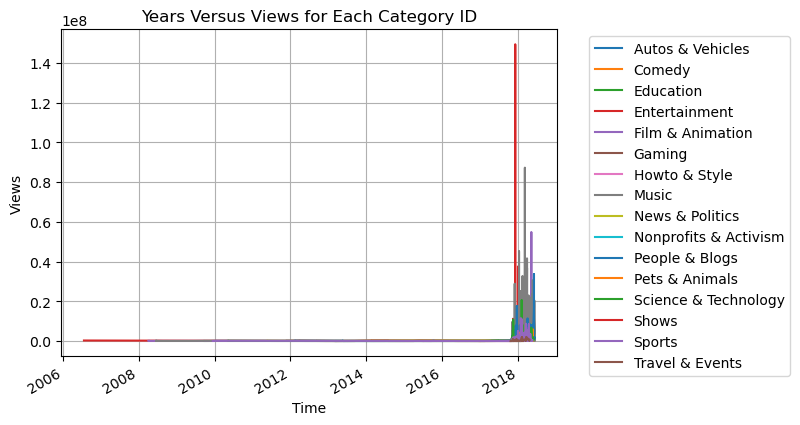

In [110]:
fig, ax = plt.subplots()

for key, grp in df.groupby(['category_id']):

    ax = grp.plot(ax=ax, kind='line', x='upload_datetime', y='views', label=key)

plt.title('Years Versus Views for Each Category ID')
plt.xlabel('Time')
plt.ylabel('Views')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)


**Explanatin of Graph:** As mentioned, the graph above is comparing the years to the views group by the different possible categories. As you can see, this plot is not that useful in understanding the data. There does not seem to be any direct correlation between the number of views and the years for the categories; they are kind of all over the place. So, what if we look at a portion of the data?

**Step 8:** As mentioned above, the graph that shows all dates versus views for each category does not really tell us anything. We looked at it, though, and realized most of the clutter is in 2018. So, we thought that we should plot another graph that only shows views vs time for each category for 2018. The code is mostly the same, except we used a boolean mask that only keeps rows where the datetime is January 1st, 2018 or later.

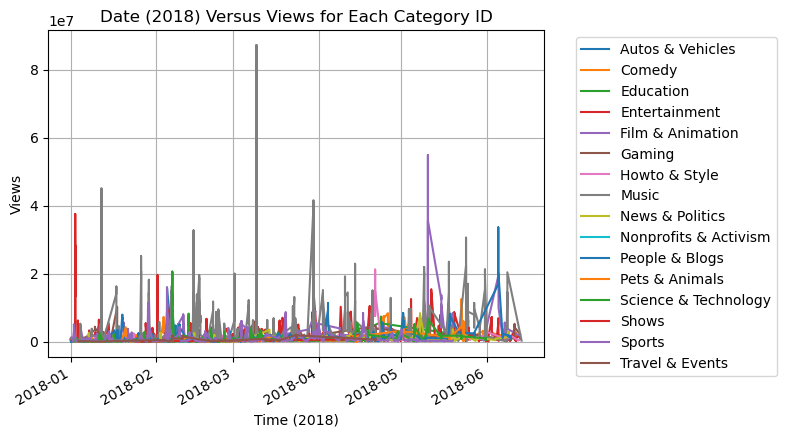

In [118]:
fig, ax = plt.subplots()

start_date = pd.to_datetime(f'{2018}-01-01')
filtered_dates = df[df['upload_datetime'] >= start_date].copy()

for key, grp in filtered_dates.groupby(['category_id']):

    ax = grp.plot(ax=ax, kind='line', x='upload_datetime', y='views', label=key)

plt.title('Date (2018) Versus Views for Each Category ID')
plt.xlabel('Time (2018)')
plt.ylabel('Views')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)


**Explanation/Examination of Plot:** Now that we were able to look more closely at the main cluster of data, it appears that there is no correlation between the number of views for any of the categories across time. 

**Step 9:** This step includes more data visualization. It creates a bar graph that displays how many videos of each category are in the dataset. This is important to know because it is helpful to see what the most popular videos that content creators make are and what the least popular videos that content creators make are. The "value_counts()" function sums up the number of times each category is in the "category_id" column and stores all the results as a list. Then, that list is plotted as a bar graph. "Plt.figure" creates the size of the plot. In this case, it has width of 28 and length of 4. Then, "frequency.plot" plots the number of each category as the type of plot specified, which is a bar plot in this case. 

Text(0, 0.5, 'Frequency')

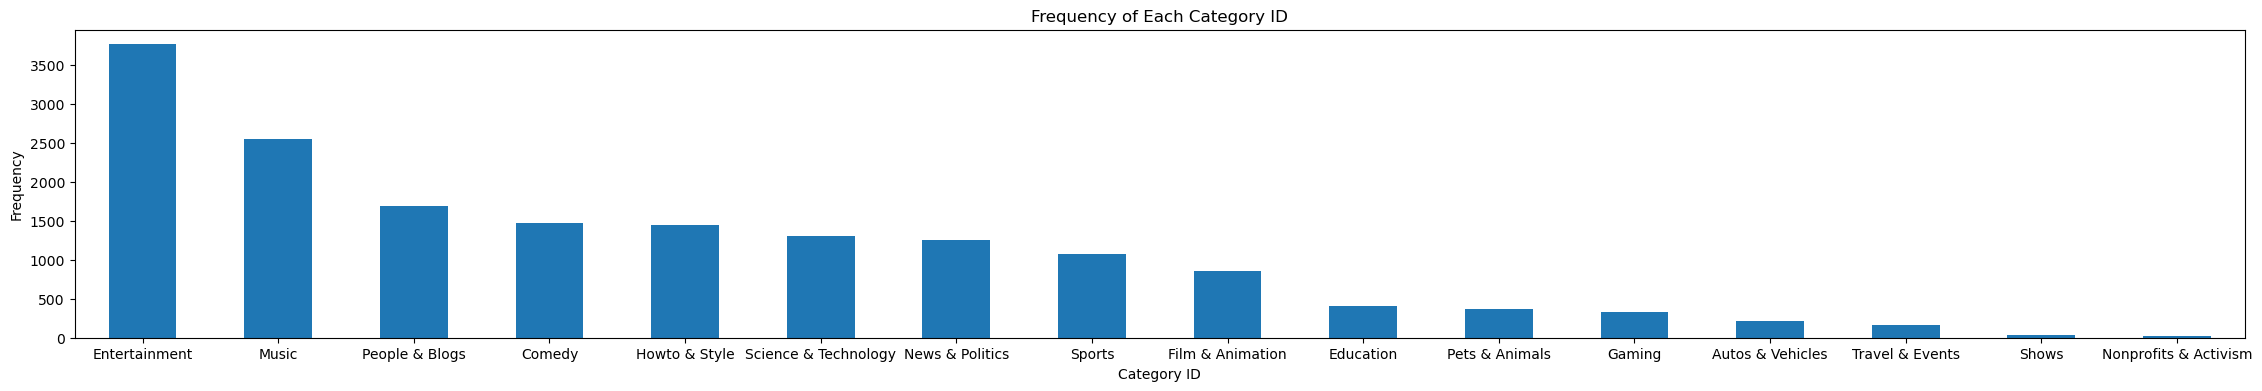

In [120]:
frequency = df['category_id'].value_counts()

plt.figure(figsize=(28, 4))
frequency.plot(kind='bar')
plt.title('Frequency of Each Category ID')
plt.xticks(rotation=0)
plt.xlabel('Category ID')
plt.ylabel('Frequency')


**Explanation of Graph:** The graph above shows how many YouTube videos were in each possible category. The most frequent type of content was entertainment, while the least frequent type of content was nonprofits and activism. This means that the most popular videos, meaning the videos that users mostly watch, are entertainment videos, while the videos that are least popular focus on nonprofits and activism.

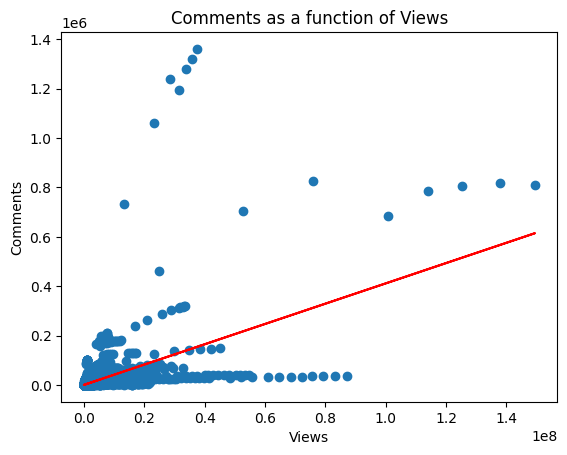

                            OLS Regression Results                            
Dep. Variable:          comment_count   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     7274.
Date:                Sat, 18 May 2024   Prob (F-statistic):               0.00
Time:                        01:09:49   Log-Likelihood:            -1.9742e+05
No. Observations:               16985   AIC:                         3.948e+05
Df Residuals:                   16983   BIC:                         3.949e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -269.6828    222.116     -1.214      0.2

In [465]:
df_lin_reg = df[['views', 'comment_count']]
np_lin_reg = df_lin_reg.values
X = np_lin_reg[:,0]
X_ones = np.vstack([X, np.ones(len(X))]).T
Y = np_lin_reg[:,1]

lst_sq, residual, _, _ = np.linalg.lstsq(X_ones, Y, rcond=None)
slope, intercept = lst_sq

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df['views'], df['comment_count'])
ax.plot(X, intercept + slope*X, 'r')
ax.set_title('Comments as a function of Views')
ax.set_xlabel('Views')
ax.set_ylabel('Comments')
plt.show()

lin_reg = smf.ols(formula="comment_count ~ views ", data=df).fit()
print(lin_reg.summary())

In [466]:
alpha = 0.05
dfn = 1 #k (degrees of freedom)
dfd = 16983 #n - k -1

critical_val = f.ppf(1-alpha, dfn, dfd)
print("critical_val: ", critical_val)

critical_val:  3.842006433905074


If we have H0 be there is no relationship between views and comments, then we would reject that hypothesis. The reason we reject this hypothesis is that since alpha = 0.05, based on our dataset we have a critical value of 3.842. From the OLS linear regression data, we have an F statistic of 7274. Since our critical value is less than our F statistic, we reject our null hypothesis. Thus there is a relationship between views and comments.

Text(0, 0.5, 'Comment Count')

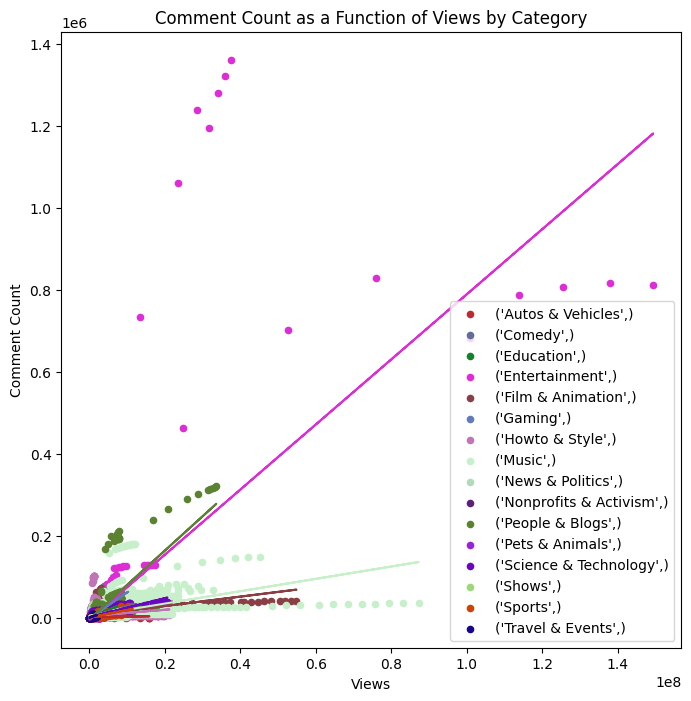

In [467]:
df_by_cont = df.groupby(['category_id'])
groups = df_by_cont.groups

def generate_color():
    return "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

colors = [generate_color() for _ in range(20)]

fig, ax = plt.subplots(figsize=(8,8))
for idx, (key, values) in enumerate(df.groupby(['category_id'])):

    ax = values.plot(ax=ax, kind='scatter', x='views', y='comment_count', label=key, color=colors[idx])
    x = values['views']
    y = values['comment_count']
    res = stats.linregress(x,y)
    ax.plot(x, res.intercept + res.slope*x, colors[idx])

ax.set_title('Comment Count as a Function of Views by Category')
ax.set_xlabel('Views')
ax.set_ylabel('Comment Count')

In [468]:
lin_reg2 = smf.ols(formula='comment_count ~ category_id*views', data=df).fit()
print(str(lin_reg2.summary()))

                            OLS Regression Results                            
Dep. Variable:          comment_count   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     506.5
Date:                Sat, 18 May 2024   Prob (F-statistic):               0.00
Time:                        01:09:50   Log-Likelihood:            -1.9488e+05
No. Observations:               16985   AIC:                         3.898e+05
Df Residuals:                   16953   BIC:                         3.901e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [469]:
alpha = 0.05
dfn = 31 #k (degrees of freedom)
dfd = 16953 #n - k -1

critical_val = f.ppf(1-alpha, dfn, dfd)
print("critical_val: ", critical_val)

critical_val:  1.4518242081905073


If we have H0 be there is no relationship between views and comments, when seperating by video category, then we would reject that hypothesis. The reason we reject this hypothesis is that since alpha = 0.05, based on our dataset we have a critical value of 1.452. From the OLS linear regression data, we have an F statistic of 506.5. Since our critical value is less than our F statistic, we reject our null hypothesis. Thus there is a relationship between views and comments, when seperating by category.

In [470]:
f_val, p_val, diff_df = lin_reg2.compare_f_test(lin_reg) # returns f val, p val, difference in df
print("F-Statistic: ", f_val)

alpha = 0.05
dfn = lin_reg2.df_model - lin_reg.df_model
dfd = lin_reg2.df_resid
critical_val = f.ppf(1-alpha, dfn, dfd)

print("critical_val: ", critical_val)

F-Statistic:  196.98314642313827
critical_val:  1.459777783506337


Is the interaction model significantly better than the view count only model? Why?
Our null hypothesis is that our original linear regression is just as good as our model which accounts for the category type. From our F test, we get an F statistic of 196.98 and since we have a significance level of 0.05, our critical value is 1.4598 so our F statistic is greater than our critical value which means we reject the null hypothesis. Thus, our model which accounts for the continent is statistically better than our model which only accounts for year.

In [82]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anshjain/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [471]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()

df['sentiment'] = df['description'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
df['like_dislike_ratio'] = df.apply(lambda x: np.log(x['likes']/x['dislikes']) if x['dislikes'] != 0 else np.NaN, axis=1)

df.head()


,video_id,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,upload_datetime,sentiment,like_dislike_ratio
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13 17:13:01,0.7038,2.965040
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13 07:30:00,0.6705,2.760815
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12 18:01:41,0.9290,4.196949
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,Entertainment,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,2017-11-12 05:37:17,0.0000,1.878106
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,Film & Animation,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th...",2017-11-13 14:00:23,0.9826,3.393606


[  62085.18966125 1628412.68938849]
                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.012
Date:                Sat, 18 May 2024   Prob (F-statistic):              0.314
Time:                        01:09:55   Log-Likelihood:            -2.8352e+05
No. Observations:               16985   AIC:                         5.670e+05
Df Residuals:                   16983   BIC:                         5.671e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.62

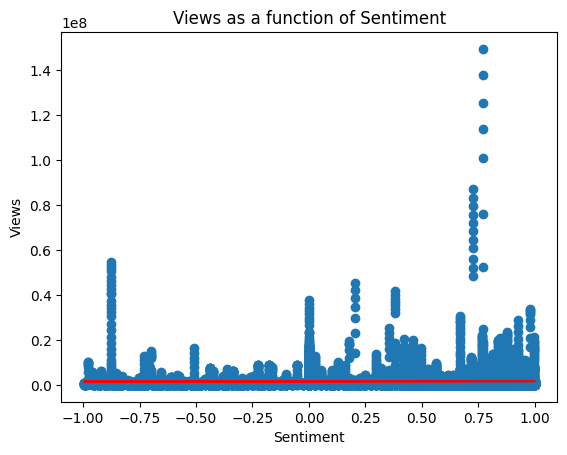

In [472]:
df_lin_reg = df[['sentiment', 'views']]

np_lin_reg = df_lin_reg.values
X = np_lin_reg[:,0]
X_ones = np.vstack([X, np.ones(len(X))]).T
Y = np_lin_reg[:,1]

lst_sq, residual, _, _ = np.linalg.lstsq(X_ones, Y, rcond=None)

slope, intercept = lst_sq
print(lst_sq)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df['sentiment'], df['views'])
ax.plot(X, intercept + slope*X, 'r')
ax.set_title('Views as a function of Sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Views')

lin_reg = smf.ols(formula="views ~ sentiment ", data=df).fit()
print(lin_reg.summary())

[ 917.58426178 6194.99654033]
                            OLS Regression Results                            
Dep. Variable:          comment_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.917
Date:                Sat, 18 May 2024   Prob (F-statistic):             0.0478
Time:                        01:09:55   Log-Likelihood:            -2.0045e+05
No. Observations:               16985   AIC:                         4.009e+05
Df Residuals:                   16983   BIC:                         4.009e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6194.9965 

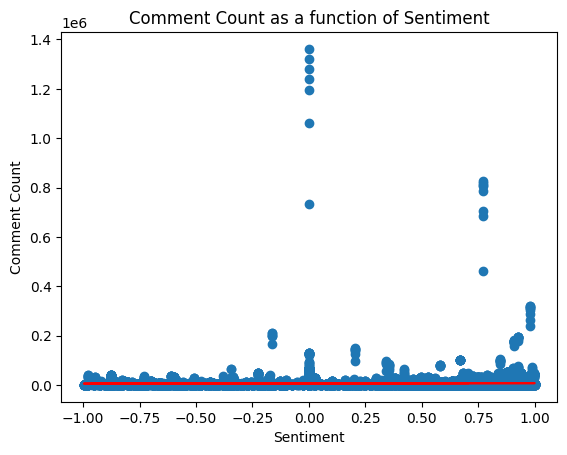

In [473]:
df_lin_reg = df[['sentiment', 'comment_count']]

np_lin_reg = df_lin_reg.values
X = np_lin_reg[:,0]
X_ones = np.vstack([X, np.ones(len(X))]).T
Y = np_lin_reg[:,1]

lst_sq, residual, _, _ = np.linalg.lstsq(X_ones, Y, rcond=None)

slope, intercept = lst_sq
print(lst_sq)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df['sentiment'], df['comment_count'])
ax.plot(X, intercept + slope*X, 'r')
ax.set_title('Comment Count as a function of Sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Comment Count')

lin_reg = smf.ols(formula="comment_count ~ sentiment ", data=df).fit()
print(lin_reg.summary())

[0.41260318 3.06211725]
                            OLS Regression Results                            
Dep. Variable:     like_dislike_ratio   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     562.5
Date:                Sat, 18 May 2024   Prob (F-statistic):          2.44e-122
Time:                        01:09:55   Log-Likelihood:                -26951.
No. Observations:               16780   AIC:                         5.391e+04
Df Residuals:                   16778   BIC:                         5.392e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0621      0

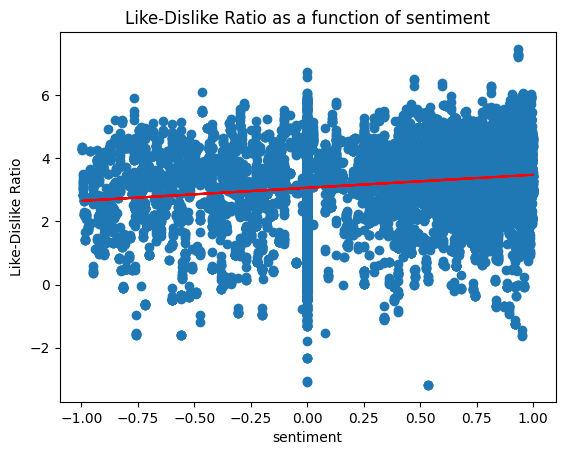

In [474]:
df_lin_reg = df[['sentiment', 'like_dislike_ratio']]

df_lin_reg=df_lin_reg.dropna(axis=0)
np_lin_reg = df_lin_reg.values
X = np_lin_reg[:,0]
X_ones = np.vstack([X, np.ones(len(X))]).T
Y = np_lin_reg[:,1]

lst_sq, residual, _, _ = np.linalg.lstsq(X_ones, Y, rcond=None)

slope, intercept = lst_sq
print(lst_sq)

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df['sentiment'], df['like_dislike_ratio'])
ax.plot(X, intercept + slope*X, 'r')
ax.set_title('Like-Dislike Ratio as a function of sentiment')
ax.set_xlabel('sentiment')
ax.set_ylabel('Like-Dislike Ratio')

lin_reg = smf.ols(formula="like_dislike_ratio ~ sentiment ", data=df).fit()
print(lin_reg.summary())

Since it appears there is no correlation with the data, what if we only look at one video category

(412, 18)


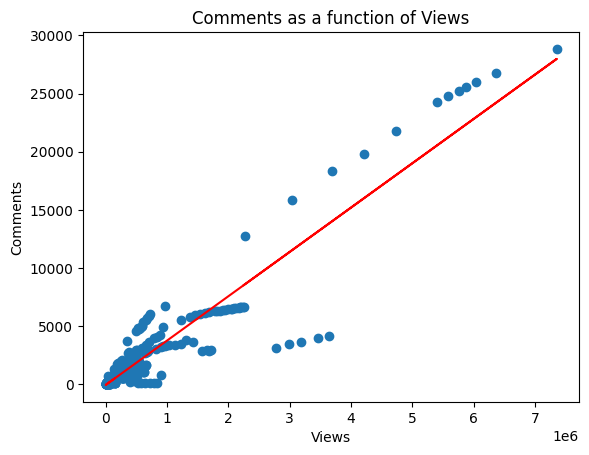

                            OLS Regression Results                            
Dep. Variable:          comment_count   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     2684.
Date:                Sat, 18 May 2024   Prob (F-statistic):          4.95e-182
Time:                        01:09:55   Log-Likelihood:                -3581.5
No. Observations:                 412   AIC:                             7167.
Df Residuals:                     410   BIC:                             7175.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -57.6472     83.240     -0.693      0.4

In [475]:
df2 = df[df['category_id'] == 'Education']
print(df2.shape)
df2.head()

df_lin_reg = df2[['views', 'comment_count']]
np_lin_reg = df_lin_reg.values
X = np_lin_reg[:,0]
X_ones = np.vstack([X, np.ones(len(X))]).T
Y = np_lin_reg[:,1]

lst_sq, residual, _, _ = np.linalg.lstsq(X_ones, Y, rcond=None)
slope, intercept = lst_sq

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df2['views'], df2['comment_count'])
ax.plot(X, intercept + slope*X, 'r')
ax.set_title('Comments as a function of Views')
ax.set_xlabel('Views')
ax.set_ylabel('Comments')
plt.show()

lin_reg = smf.ols(formula="comment_count ~ views ", data=df2).fit()
print(lin_reg.summary())

In [476]:
alpha = 0.05
dfn = 1 #k (degrees of freedom)
dfd = 410 #n - k -1

critical_val = f.ppf(1-alpha, dfn, dfd)
print("critical_val: ", critical_val)

critical_val:  3.864239267921459


If we have H0 be there is no relationship between views and comments for educational videos, then we would reject that hypothesis. The reason we reject this hypothesis is that since alpha = 0.05, based on our dataset we have a critical value of 3.864. From the OLS linear regression data, we have an F statistic of 2684. Since our critical value is less than our F statistic, we reject our null hypothesis. Thus there is a relationship between views and comments for educational videos

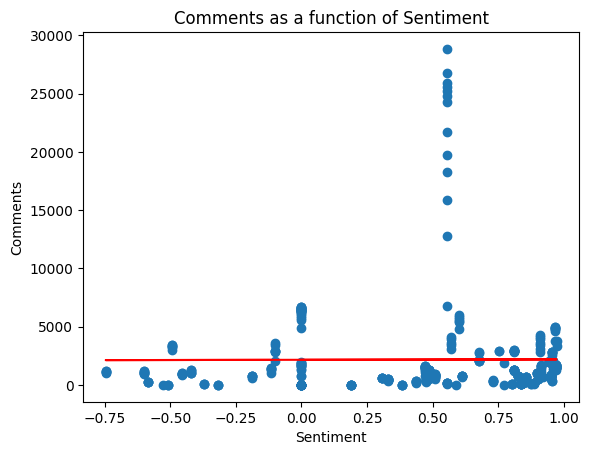

                            OLS Regression Results                            
Dep. Variable:          comment_count   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                  0.008253
Date:                Sat, 18 May 2024   Prob (F-statistic):              0.928
Time:                        01:09:55   Log-Likelihood:                -3997.8
No. Observations:                 412   AIC:                             8000.
Df Residuals:                     410   BIC:                             8008.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2155.8290    273.552      7.881      0.0

In [477]:
df_lin_reg = df2[['sentiment', 'comment_count']]
np_lin_reg = df_lin_reg.values
X = np_lin_reg[:,0]
X_ones = np.vstack([X, np.ones(len(X))]).T
Y = np_lin_reg[:,1]

lst_sq, residual, _, _ = np.linalg.lstsq(X_ones, Y, rcond=None)
slope, intercept = lst_sq

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df2['sentiment'], df2['comment_count'])
ax.plot(X, intercept + slope*X, 'r')
ax.set_title('Comments as a function of Sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Comments')
plt.show()

lin_reg = smf.ols(formula="comment_count ~ sentiment ", data=df2).fit()
print(lin_reg.summary())

If we have H0 be there is no relationship between sentiment and comments for educational videos, then we would accept that null hypothesis. The reason we accept this hypothesis is that since alpha = 0.05, based on our dataset we have a critical value of 3.864. From the OLS linear regression data, we have an F statistic of 0.008253. Since our critical value is greater than our F statistic, we accept our null hypothesis. Thus there is no relationship between sentiment and comments for educational videos

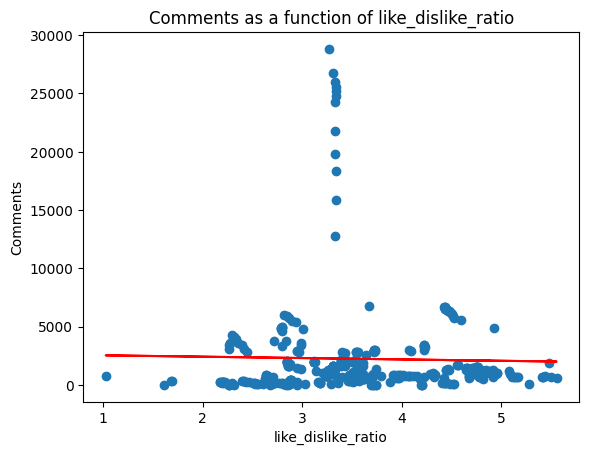

                            OLS Regression Results                            
Dep. Variable:          comment_count   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2564
Date:                Sat, 18 May 2024   Prob (F-statistic):              0.613
Time:                        01:09:56   Log-Likelihood:                -3913.5
No. Observations:                 403   AIC:                             7831.
Df Residuals:                     401   BIC:                             7839.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2646.8174    863

In [478]:
df_lin_reg = df2[['like_dislike_ratio', 'comment_count']]
df_lin_reg = df_lin_reg.dropna()
np_lin_reg = df_lin_reg.values
X = np_lin_reg[:,0]
X_ones = np.vstack([X, np.ones(len(X))]).T
Y = np_lin_reg[:,1]

lst_sq, residual, _, _ = np.linalg.lstsq(X_ones, Y, rcond=None)
slope, intercept = lst_sq

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df2['like_dislike_ratio'], df2['comment_count'])
ax.plot(X, intercept + slope*X, 'r')
ax.set_title('Comments as a function of like_dislike_ratio')
ax.set_xlabel('like_dislike_ratio')
ax.set_ylabel('Comments')
plt.show()

lin_reg = smf.ols(formula="comment_count ~ like_dislike_ratio ", data=df2).fit()
print(lin_reg.summary())

If we have H0 be there is no relationship between log-like-dislike ratio and comments for educational videos, then we would accept that null hypothesis. The reason we accept this hypothesis is that since alpha = 0.05, based on our dataset we have a critical value of 3.864. From the OLS linear regression data, we have an F statistic of 0.2564. Since our critical value is greater than our F statistic, we accept our null hypothesis. Thus there is no relationship between log-like-dislike ratio and comments for educational videos

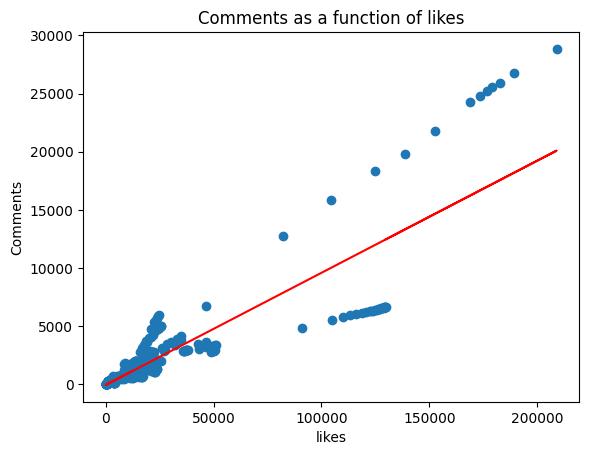

                            OLS Regression Results                            
Dep. Variable:          comment_count   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     1293.
Date:                Sat, 18 May 2024   Prob (F-statistic):          7.17e-129
Time:                        01:09:56   Log-Likelihood:                -3704.5
No. Observations:                 412   AIC:                             7413.
Df Residuals:                     410   BIC:                             7421.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.9881    114.034     -0.351      0.7

In [479]:
df_lin_reg = df2[['likes', 'comment_count']]
df_lin_reg = df_lin_reg.dropna()
np_lin_reg = df_lin_reg.values
X = np_lin_reg[:,0]
X_ones = np.vstack([X, np.ones(len(X))]).T
Y = np_lin_reg[:,1]

lst_sq, residual, _, _ = np.linalg.lstsq(X_ones, Y, rcond=None)
slope, intercept = lst_sq

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df2['likes'], df2['comment_count'])
ax.plot(X, intercept + slope*X, 'r')
ax.set_title('Comments as a function of likes')
ax.set_xlabel('likes')
ax.set_ylabel('Comments')
plt.show()

lin_reg = smf.ols(formula="comment_count ~ likes ", data=df2).fit()
print(lin_reg.summary())

If we have H0 be there is no relationship between likes and comments for educational videos, then we would accept that null hypothesis. The reason we accept this hypothesis is that since alpha = 0.05, based on our dataset we have a critical value of 3.864. From the OLS linear regression data, we have an F statistic of 1293. Since our critical value is less than our F statistic, we reject our null hypothesis. Thus there is a relationship between likes and comments for educational videos.

/var/folders/zx/pspn01gs61q8kw8848rk8b6r0000gn/T/ipykernel_30776/3816660015.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['upload_datetime_numeric'] = (df2['upload_datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


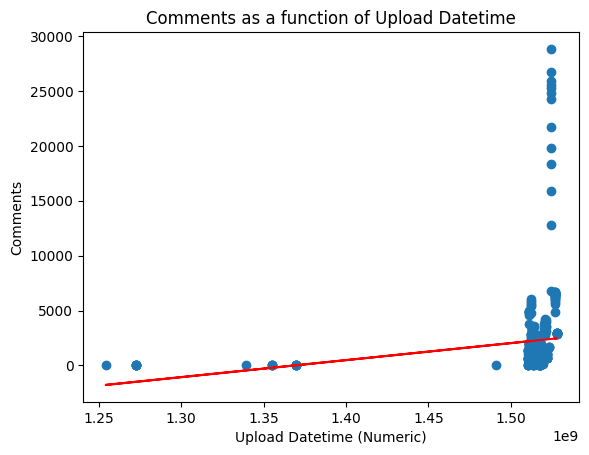

                            OLS Regression Results                            
Dep. Variable:          comment_count   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     10.25
Date:                Sat, 18 May 2024   Prob (F-statistic):            0.00148
Time:                        01:09:56   Log-Likelihood:                -3992.8
No. Observations:                 412   AIC:                             7990.
Df Residuals:                     410   BIC:                             7998.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2

In [480]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Convert datetime to numeric format (e.g., seconds since epoch)
df2['upload_datetime_numeric'] = (df2['upload_datetime'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
# df2.head()
# Prepare data for linear regression
df_lin_reg = df2[['upload_datetime_numeric', 'comment_count']].dropna()
np_lin_reg = df_lin_reg.values
X = np_lin_reg[:, 0]
Y = np_lin_reg[:, 1]

# Add a column of ones to X for the intercept term
# X_ones = np.c_[np.ones(X.shape[0]), X]
X_ones = np.vstack([X, np.ones(len(X))]).T

# Perform the least squares fitting
lst_sq, residual, _, _ = np.linalg.lstsq(X_ones, Y, rcond=None)
slope, intercept = lst_sq

# Plotting the data and the regression line
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df2['upload_datetime_numeric'], df2['comment_count'])
ax.plot(df2['upload_datetime_numeric'], intercept + slope * df2['upload_datetime_numeric'], 'r')
ax.set_title('Comments as a function of Upload Datetime')
ax.set_xlabel('Upload Datetime (Numeric)')
ax.set_ylabel('Comments')
plt.show()

# Perform linear regression using statsmodels
lin_reg = smf.ols(formula="comment_count ~ upload_datetime_numeric", data=df2).fit()
print(lin_reg.summary())


If we have H0 be there is no relationship between upload datetime and comments for educational videos, then we would accept that null hypothesis. The reason we accept this hypothesis is that since alpha = 0.05, based on our dataset we have a critical value of 3.864. From the OLS linear regression data, we have an F statistic of 10.25. Since our critical value is less than our F statistic, we reject our null hypothesis. Thus there is a relationship between upload datetime and comments for educational videos.

In [481]:
df3 = df2.copy()
df3.reset_index(inplace=True)
df3.drop('index', axis=1, inplace=True)

idx = np.random.choice(df3.shape[0], 80, replace=False)

index_array = df3.index.to_numpy()

for i in idx:
	
	mask = index_array != i
	index_array = index_array[mask]

train = df3.loc[index_array]

x = np.array(train[['views']])
y = np.array(train['comment_count'])

ones_column = np.ones((x.shape[0], 1))
x = np.concatenate((x, ones_column), axis=1)

# gradient descent with ridge regression
def grad_descent(X,y,T,alpha, lambda_reg):
    m, n = X.shape
    theta = np.zeros(n)
    f = np.zeros(T)
    for i in range(T):
        f[i] = 0.5 * np.linalg.norm(X.dot(theta) - y)**2 + 0.5 * lambda_reg * np.linalg.norm(theta)**2
        g = np.transpose(X).dot(X.dot(theta) - y)
        theta = theta* (1 - (alpha*lambda_reg)/m) - alpha * g
    return(theta,f)

T = 10000000
alpha = 0.00000000000000001
lambda_reg = 0.000000000001

theta, loss = grad_descent(x, y, T, alpha, lambda_reg)

print("Views Theta: ", theta[0])
print("Bias: ", theta[1])
print("All losses: \n", loss/(x.shape[1]))
print("Final Loss: ", loss[-1]/x.shape[1])

Views Theta:  0.003746901931614275
Bias:  -6.358910061582171e-07
All losses: 
 [1.58974459e+09 1.57857423e+09 1.56749289e+09 ... 1.88238589e+08
 1.88238589e+08 1.88238589e+08]
Final Loss:  188238589.0073183


/var/folders/zx/pspn01gs61q8kw8848rk8b6r0000gn/T/ipykernel_30776/3376342121.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(new_labels)
/var/folders/zx/pspn01gs61q8kw8848rk8b6r0000gn/T/ipykernel_30776/3376342121.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_xticklabels(new_labels)


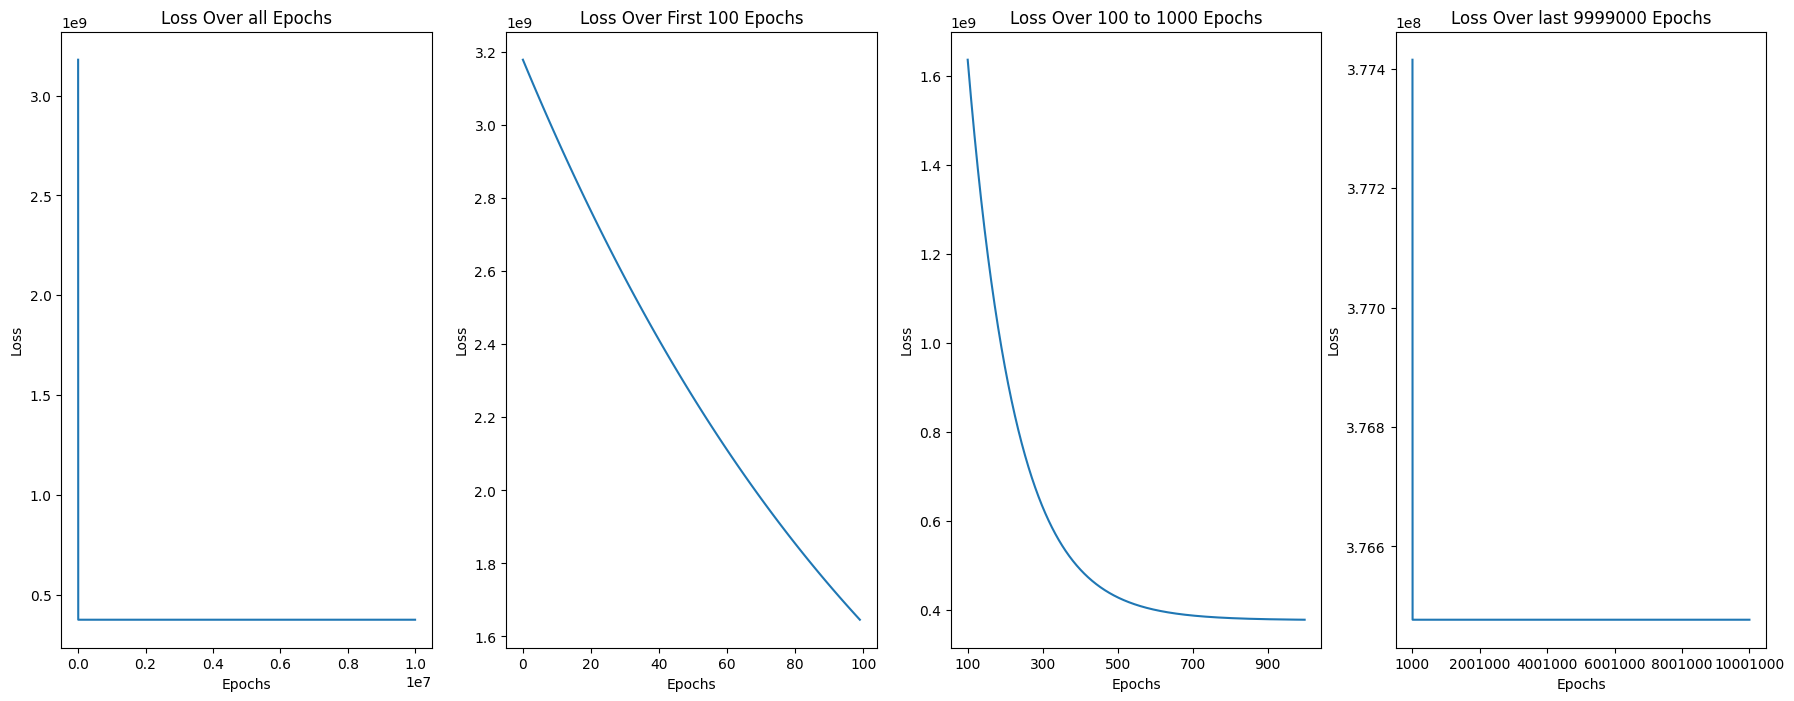

In [482]:
_, ax = plt.subplots(1, 4, figsize=(22, 8))

ax[0].plot(loss)
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Loss Over all Epochs")

ax[1].plot(loss[:100])
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].set_title("Loss Over First 100 Epochs")

ax[2].plot(loss[100:1000])
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel("Loss")
ax[2].set_title("Loss Over 100 to 1000 Epochs")
new_labels = [str(int(tick) + 100) for tick in ax[2].get_xticks()]
ax[2].set_xticklabels(new_labels)

ax[3].plot(loss[1000:])
ax[3].set_xlabel("Epochs")
ax[3].set_ylabel("Loss")
ax[3].set_title("Loss Over last 9999000 Epochs")
new_labels = [str(int(tick) + 1000) for tick in ax[3].get_xticks()]
ax[3].set_xticklabels(new_labels)

plt.show()

In [488]:
df3 = df2.copy()
df3.reset_index(inplace=True)
df3.drop('index', axis=1, inplace=True)

idx = np.random.choice(df3.shape[0], 80, replace=False)

index_array = df3.index.to_numpy()

for i in idx:
	
	mask = index_array != i
	index_array = index_array[mask]

train = df3.loc[index_array]

x = np.array(train[['views', 'likes', 'upload_datetime_numeric']])
y = np.array(train['comment_count'])

ones_column = np.ones((x.shape[0], 1))
x = np.concatenate((x, ones_column), axis=1)

# gradient descent with ridge regression
def grad_descent(X,y,T,alpha, lambda_reg):
    m, n = X.shape
    theta = np.zeros(n)
    f = np.zeros(T)
    for i in range(T):
        f[i] = 0.5 * np.linalg.norm(X.dot(theta) - y)**2 + 0.5 * lambda_reg * np.linalg.norm(theta)**2
        g = np.transpose(X).dot(X.dot(theta) - y)
        theta = theta* (1 - (alpha*lambda_reg)/m) - alpha * g
    return(theta,f)

T = 100000000
alpha = 0.0000000000000000000000001
lambda_reg = 0.00000000001

theta, loss = grad_descent(x, y, T, alpha, lambda_reg)

print("Views Theta: ", theta[0])
print("Likes Theta:", theta[1])
print("Upload Datetime Theta: ", theta[2])
print("Bias: ", theta[3])
print("All Losses: \n", loss/(x.shape[1]))
print("Final Loss: ", loss[-1]/x.shape[1])

Views Theta:  1.0148947229243491e-05
Likes Theta: 3.518403713230005e-07
Upload Datetime Theta:  1.373928926290617e-06
Bias:  -4.189333775545096e-14
All Losses: 
 [7.32693922e+08 7.32666704e+08 7.32639489e+08 ... 5.50415417e+08
 5.50415417e+08 5.50415417e+08]
Final Loss:  550415416.7213976


/var/folders/zx/pspn01gs61q8kw8848rk8b6r0000gn/T/ipykernel_30776/3437289867.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(new_labels)
/var/folders/zx/pspn01gs61q8kw8848rk8b6r0000gn/T/ipykernel_30776/3437289867.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[3].set_xticklabels(new_labels)


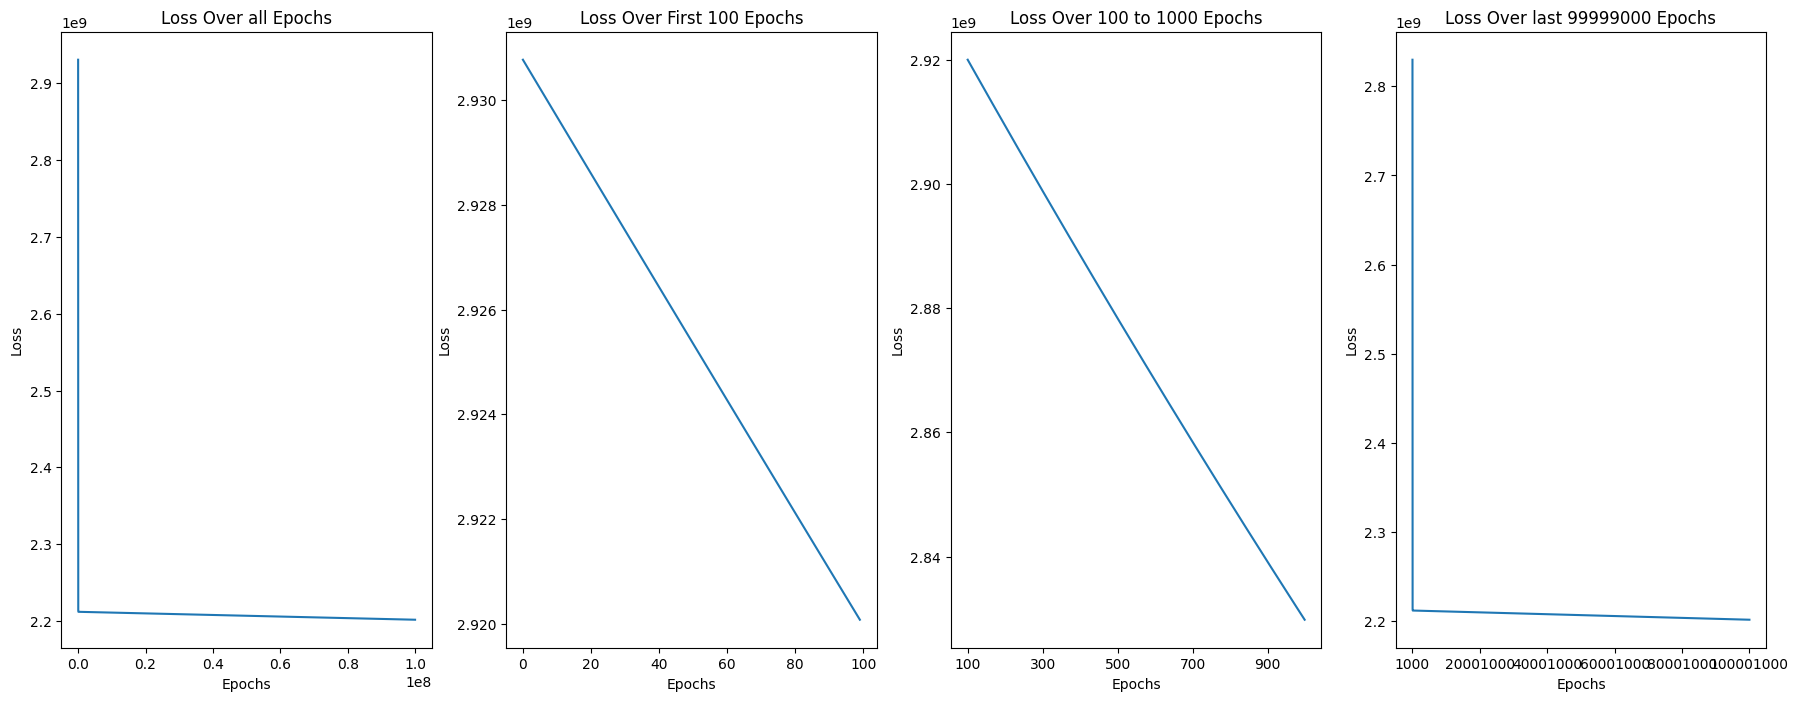

In [489]:
_, ax = plt.subplots(1, 4, figsize=(22, 8))

ax[0].plot(loss)
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Loss Over all Epochs")

ax[1].plot(loss[:100])
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].set_title("Loss Over First 100 Epochs")

ax[2].plot(loss[100:1000])
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel("Loss")
ax[2].set_title("Loss Over 100 to 1000 Epochs")
new_labels = [str(int(tick) + 100) for tick in ax[2].get_xticks()]
ax[2].set_xticklabels(new_labels)

ax[3].plot(loss[1000:])
ax[3].set_xlabel("Epochs")
ax[3].set_ylabel("Loss")
ax[3].set_title("Loss Over last 99999000 Epochs")
new_labels = [str(int(tick) + 1000) for tick in ax[3].get_xticks()]
ax[3].set_xticklabels(new_labels)

plt.show()

In [490]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [511]:
df3 = df2.copy()
df3.reset_index(inplace=True)
df3.drop('index', axis=1, inplace=True)

idx = np.random.choice(df3.shape[0], 80, replace=False)

index_array = df3.index.to_numpy()

for i in idx:
	
	mask = index_array != i
	index_array = index_array[mask]

train = df3.loc[index_array]

x = np.array(train[['views', 'likes', 'upload_datetime_numeric']])
y = np.array(train['comment_count']).reshape(-1,1)

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

dataset = TensorDataset(x, y)
train_loader = DataLoader(dataset, batch_size=2, shuffle=True)

In [515]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(3, 20)
        self.fc2 = nn.Linear(20, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [567]:
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.000001)
num_epochs = 25001

total_loss = []

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    total_loss.append(loss.item())
    
    if(epoch%500 == 0):
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/25001], Loss: 437966908424192.0000
Epoch [501/25001], Loss: 5297259.5000
Epoch [1001/25001], Loss: 56031.5508
Epoch [1501/25001], Loss: 11776493.0000
Epoch [2001/25001], Loss: 535741.8125
Epoch [2501/25001], Loss: 3053875.5000
Epoch [3001/25001], Loss: 27740.7812
Epoch [3501/25001], Loss: 3084143.0000
Epoch [4001/25001], Loss: 6726786.0000
Epoch [4501/25001], Loss: 6630443.0000
Epoch [5001/25001], Loss: 3246335.7500
Epoch [5501/25001], Loss: 1746570.5000
Epoch [6001/25001], Loss: 435695.4062
Epoch [6501/25001], Loss: 101827.6328
Epoch [7001/25001], Loss: 1336429.2500
Epoch [7501/25001], Loss: 3249747.0000
Epoch [8001/25001], Loss: 18704.6406
Epoch [8501/25001], Loss: 403959.9688
Epoch [9001/25001], Loss: 1301065.2500
Epoch [9501/25001], Loss: 11912056.0000
Epoch [10001/25001], Loss: 705619.7500
Epoch [10501/25001], Loss: 7950005.5000
Epoch [11001/25001], Loss: 442223.0000
Epoch [11501/25001], Loss: 146397.0156
Epoch [12001/25001], Loss: 5236489.0000
Epoch [12501/25001], Loss: 

In [568]:
test = df3.iloc[idx]
x = np.array(test[['views', 'likes', 'upload_datetime_numeric']])
y = np.array(test['comment_count']).reshape(-1,1)

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

dataset = TensorDataset(x, y)
test_loader = DataLoader(dataset, batch_size=2, shuffle=True)

model.eval()
with torch.no_grad():
    predictions = model(x)
    mse = criterion(predictions, y).item()
    print(f'Mean Squared Error on test set: {mse:.4f}')

    # Calculate R-squared
    ss_total = torch.sum((y - torch.mean(y)) ** 2).item()  # Total sum of squares
    ss_residual = torch.sum((y - predictions) ** 2).item() # Residual sum of squares
    r2_score = 1 - (ss_residual / ss_total)
    print(f'R-squared on test set: {r2_score:.4f}')

Mean Squared Error on test set: 3273487.2500
R-squared on test set: 0.8338


25001


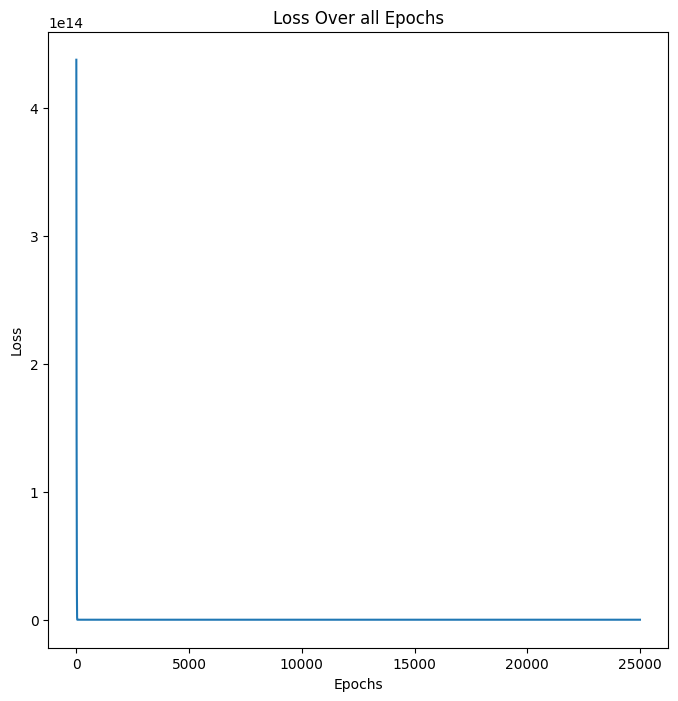

In [574]:
_, ax = plt.subplots(1, 1, figsize=(8, 8))

print(len(total_loss))
ax.plot(total_loss)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss Over all Epochs")

plt.show()